In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('stud_perf.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head(0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [14]:
print(f"Unique Vals in gender = {df['gender'].unique()}")
print(f"Unique Vals in race/ethnicity = {df['race/ethnicity'].unique()}")
print(f"Unique Vals in parental level of education = {df['parental level of education'].unique()}")
print(f"Unique Vals in lunch = {df['lunch'].unique()}")
print(f"Unique Vals in test preparation course = {df['test preparation course'].unique()}")

Unique Vals in gender = ['female' 'male']
Unique Vals in race/ethnicity = ['group B' 'group C' 'group A' 'group D' 'group E']
Unique Vals in parental level of education = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique Vals in lunch = ['standard' 'free/reduced']
Unique Vals in test preparation course = ['none' 'completed']


In [15]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(f"We have {len(numeric_features)} numeric features")
print(f"We have {len(categorical_features)} categorical features")

We have 3 numeric features
We have 5 categorical features


In [16]:
df.head(0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [17]:
df['Total Score']=df['math score']+df['writing score']+df['writing score']
df['Average Score']=df['Total Score']/3

In [18]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,220,73.333333
1,female,group C,some college,standard,completed,69,90,88,245,81.666667
2,female,group B,master's degree,standard,none,90,95,93,276,92.000000


In [20]:
reading_full=df[df['reading score']==100]['Average Score'].count()
writing_full=df[df['writing score']==100]['Average Score'].count()
math_full=df[df['math score']==100]['Average Score'].count()

print(f"No of students with full marks in maths : {math_full}")
print(f"No of students with full marks in reading : {writing_full}")
print(f"No of students with full marks in writing : {reading_full}")

No of students with full marks in maths : 7
No of students with full marks in reading : 14
No of students with full marks in writing : 17


In [21]:
reading_less_20=df[df['reading score']<=20]['Average Score'].count()
writing_less_20=df[df['writing score']<=20]['Average Score'].count()
math_less_20=df[df['math score']<=20]['Average Score'].count()

print(f"No of students with less than 20 marks in maths : {math_less_20}")
print(f"No of students with less than 20 marks in reading : {reading_less_20}")
print(f"No of students with less than 20 marks in writing : {writing_less_20}")

No of students with less than 20 marks in maths : 4
No of students with less than 20 marks in reading : 1
No of students with less than 20 marks in writing : 3


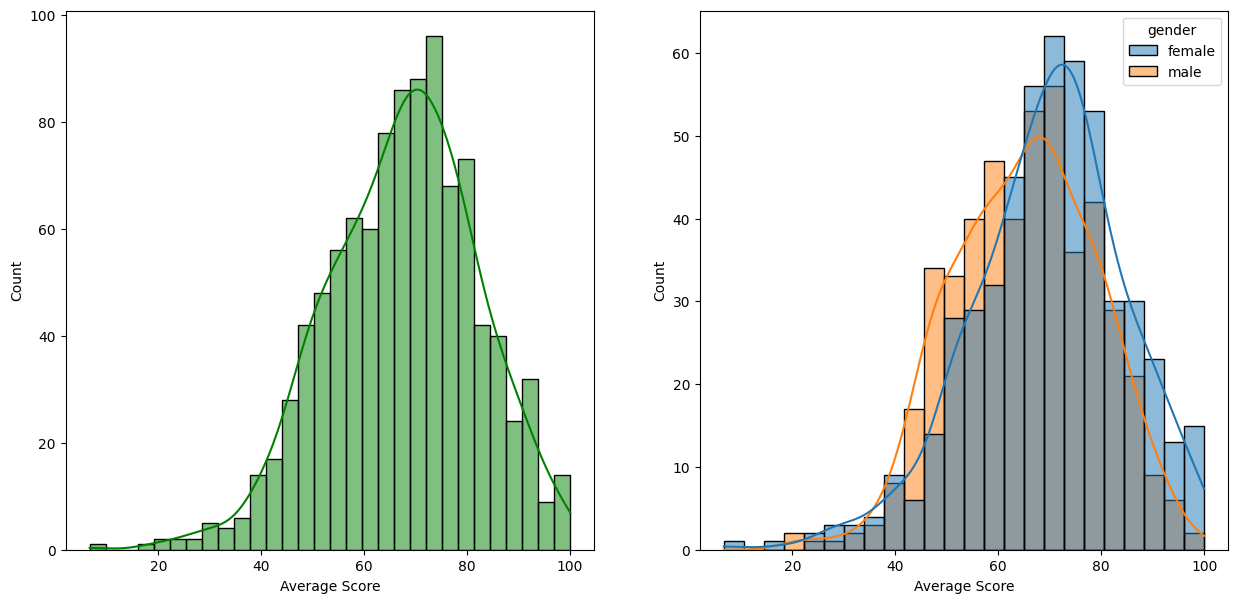

In [23]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average Score',kde=True,color='g',bins=30)
plt.subplot(122)
sns.histplot(data=df,x='Average Score',kde=True,hue='gender')
plt.show()

In [24]:
# Female students tend to perform better than the male ones

<Axes: xlabel='Average Score', ylabel='Count'>

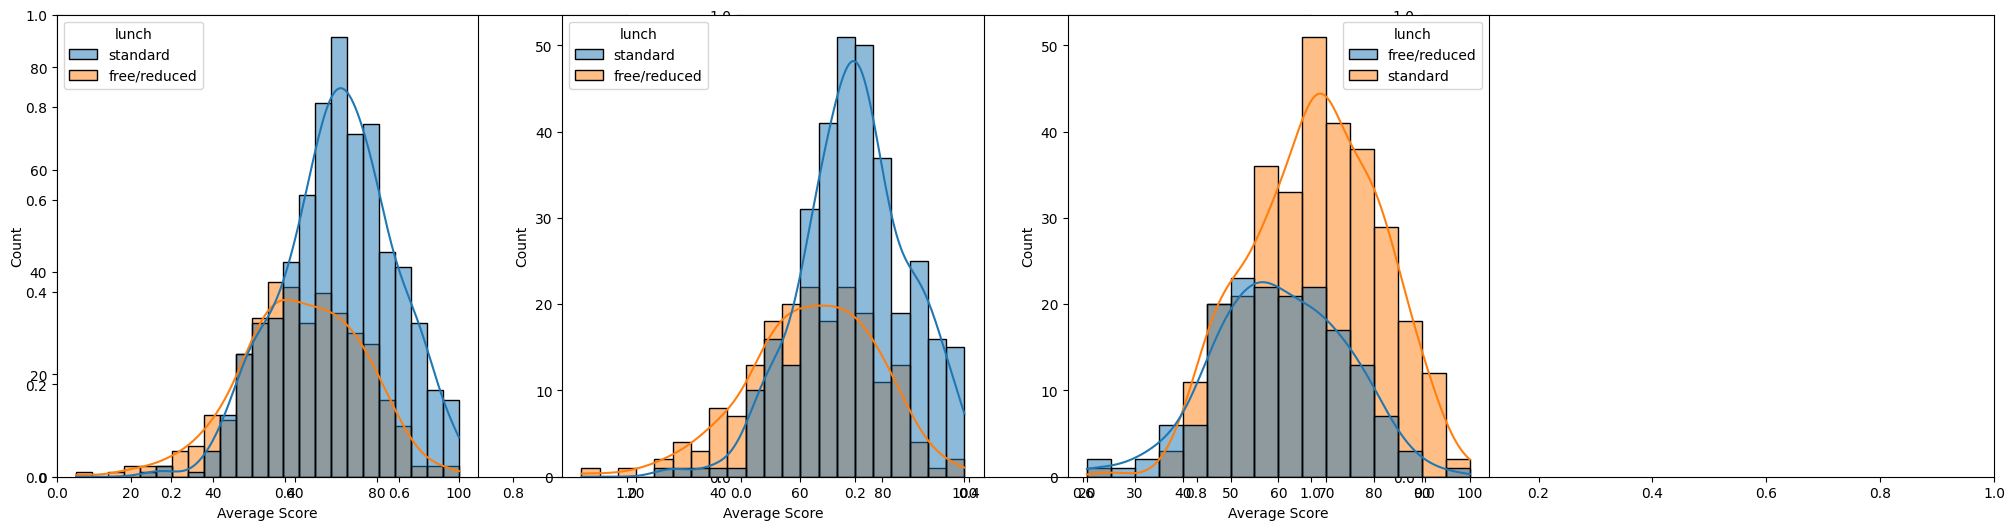

In [25]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average Score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average Score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average Score',kde=True,hue='lunch')

In [26]:
# Standard lunch helps perform better overall
# Standard lunch helps perform better in both males and females

<Axes: xlabel='Average Score', ylabel='Count'>

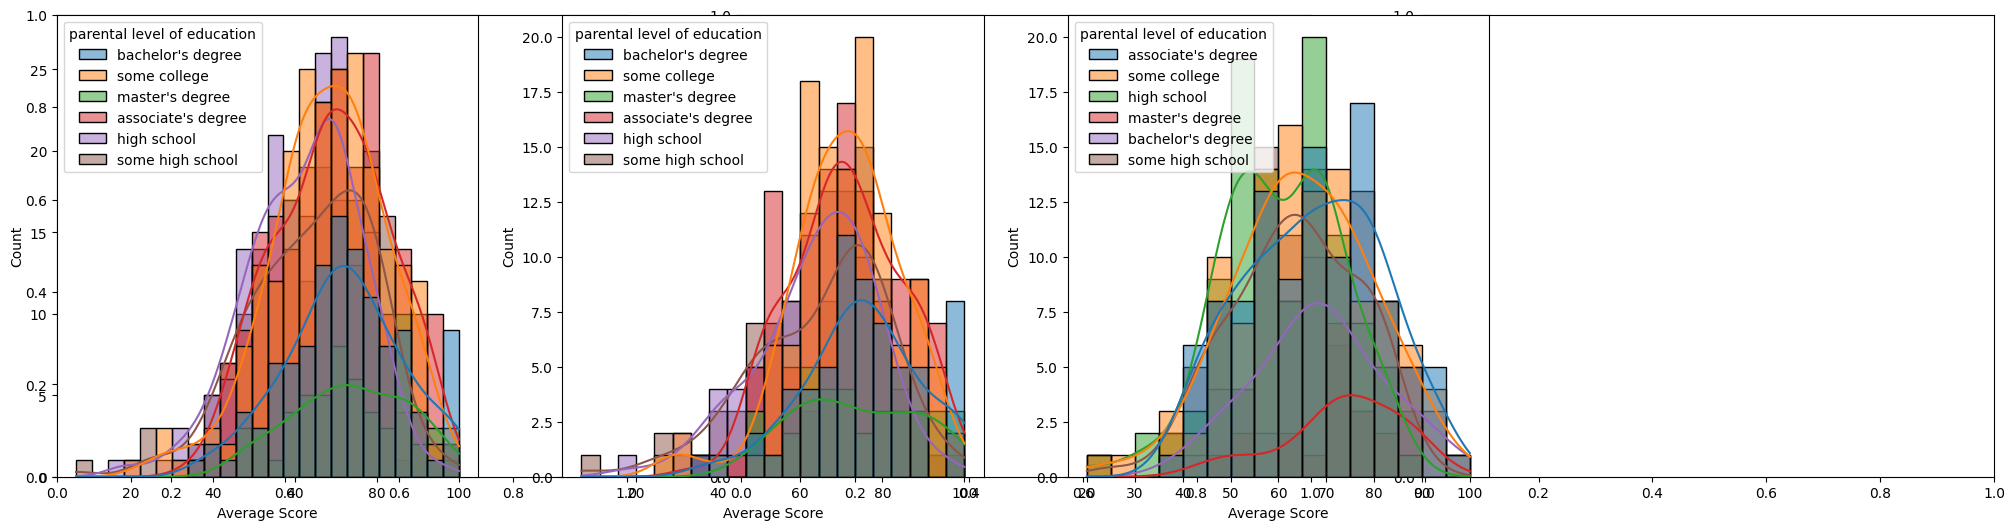

In [27]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average Score',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average Score',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average Score',kde=True,hue='parental level of education')

In [28]:
# no effect

<Axes: xlabel='Average Score', ylabel='Count'>

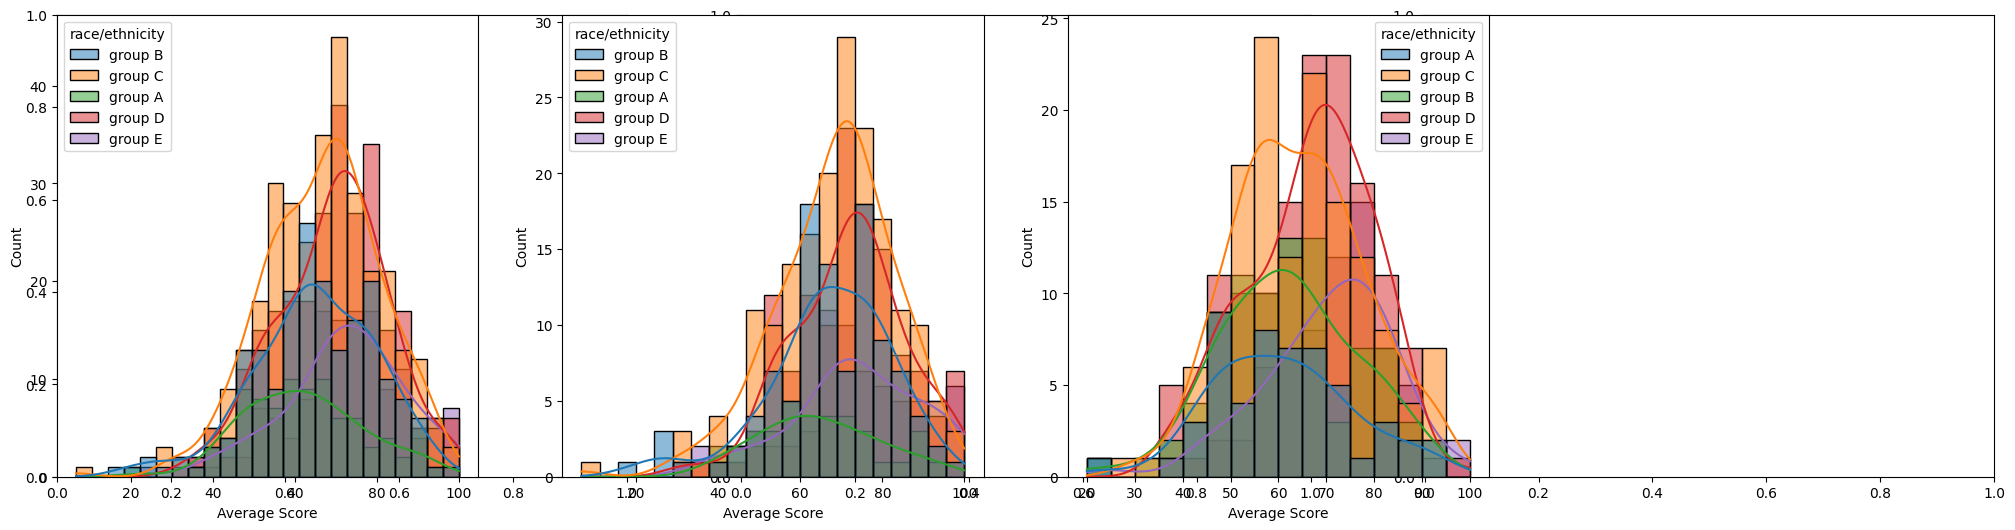

In [29]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average Score',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average Score',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average Score',kde=True,hue='race/ethnicity')

In [30]:
# Group a and b perform bad regardless of gender